# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data =pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_unique = mouse_data['Mouse ID'].unique()
mouse_count = len(mouse_unique)
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time = mouse_data[['Mouse ID','Timepoint']]
mouse_time

duplicate = mouse_time[mouse_time.duplicated()]
duplicate

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data.loc[mouse_data['Mouse ID'] != 'g989']
mouse_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_unique2 = mouse_data_clean['Mouse ID'].unique()
mouse_count = len(mouse_unique2)
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

group_drug = mouse_data_clean.groupby(['Drug Regimen'])

drug_mean = group_drug['Tumor Volume (mm3)'].mean()
drug_median = group_drug['Tumor Volume (mm3)'].median()
drug_variance = group_drug['Tumor Volume (mm3)'].var()
drug_st_dev = group_drug['Tumor Volume (mm3)'].std()
drug_st_err = group_drug['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({
    'Mean Tumor Volume': drug_mean,
    'Median Tumor Volume': drug_median,
    'Tumor Volume Variance': drug_variance,
    'Tumor Volume Std. Dev.': drug_st_dev,
    'Tumor Volume Std. Err.': drug_st_err
})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = mouse_data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

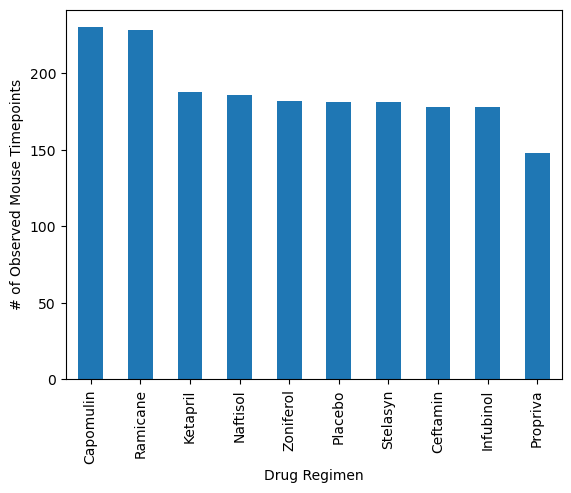

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Set x axis and tick locations

drug_value = mouse_data_clean.value_counts('Drug Regimen')

drug_value.plot(kind= 'bar', xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')

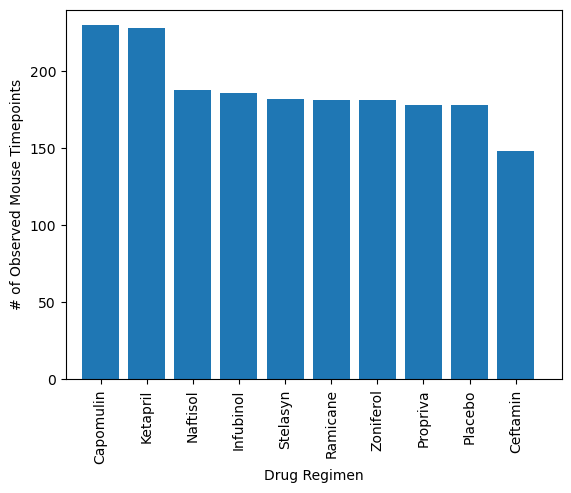

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis and tick locations
drugs = mouse_data_clean['Drug Regimen'].unique()
number_drugs = len(drugs)
x_axis = np.arange(number_drugs)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x and y labels

plt.bar(x_axis, drug_value, color= '#1f77b4', alpha= 1.0, align = 'center')
plt.xticks(tick_locations, drugs, rotation='vertical')

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(drug_value+10))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


<Axes: ylabel='Sex'>

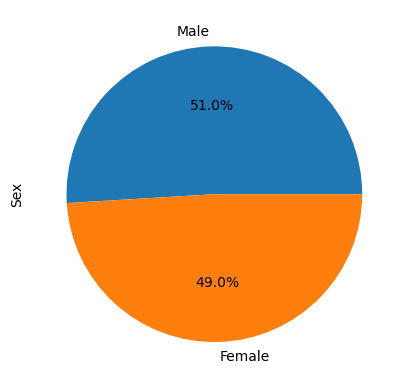

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex =  mouse_data_clean.value_counts('Sex')

mouse_sex.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')


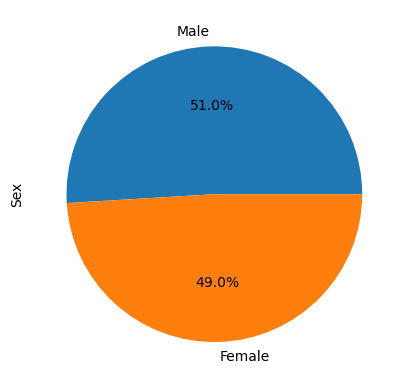

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male', 'Female']

# The values of each section of the pie chart
sizes = mouse_sex

# The colors of each section of the pie chart
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# mouse_data_regimens = mouse_data_clean.loc[((mouse_data_clean['Drug Regimen'] == 'Capomulin') | 
#                                             (mouse_data_clean['Drug Regimen'] == 'Ramicane') | 
#                                             (mouse_data_clean['Drug Regimen'] == 'Infubinol') |
#                                             (mouse_data_clean['Drug Regimen'] == 'Ceftamin'))]


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = mouse_data_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_timepoint_df





# time_per_mouse = mouse_data_regimens.groupby(['Mouse ID'])
# max_time_total = time_per_mouse.max()
# max_time = max_time_total[['Timepoint']]
# max_time = max_time.rename(columns = {'Timepoint':'Last Timepoint'})
# max_time = max_time.reset_index()


# max_time['Last Timepoint'].value_counts()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_timepoint_df = max_timepoint_df.merge(mouse_data_clean, on=['Mouse ID', 'Timepoint'], how='left')
final_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_by_drug = []

#For each key treatment
for drug in treatments:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_match_s =final_timepoint_df['Drug Regimen'] == drug
    drug_match_df =final_timepoint_df[drug_match_s]
    drug_tumor_volume_s =drug_match_df['Tumor Volume (mm3)']
    
    # add the tumor volume series to the tumor volume list
    tumor_volume_by_drug.append(drug_tumor_volume_s)
    
    # Calculate the IQR, for this drug, and quantitatively determine if there are any potential outliers for this drug. 
    quartiles = drug_tumor_volume_s.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    outlier_occupancy = [(drug_tumor_volume_s < lower_bound) | (drug_tumor_volume_s > upper_bound)]
    print(outlier_occupancy)


[19     False
24     False
61     False
64     False
66     False
80     False
83     False
85     False
87     False
108    False
115    False
121    False
124    False
162    False
163    False
169    False
174    False
180    False
183    False
192    False
204    False
208    False
220    False
226    False
239    False
Name: Tumor Volume (mm3), dtype: bool]
[6      False
7      False
10     False
12     False
33     False
37     False
45     False
52     False
70     False
76     False
77     False
91     False
93     False
96     False
119    False
126    False
157    False
158    False
166    False
168    False
177    False
190    False
217    False
235    False
244    False
Name: Tumor Volume (mm3), dtype: bool]
[0      False
1      False
11     False
13     False
27     False
31      True
41     False
50     False
56     False
78     False
97     False
101    False
123    False
129    False
141    False
142    False
153    False
170    False
197    False
200    False
202    Fa

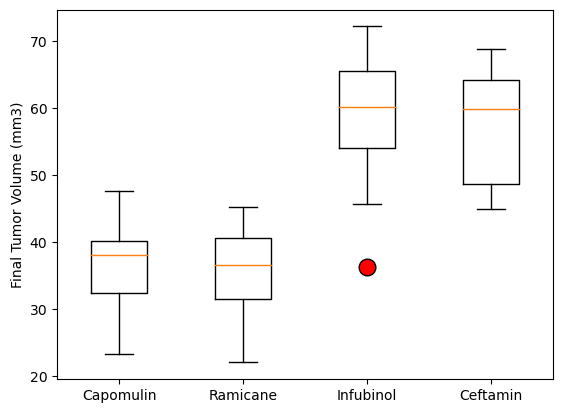

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_by_drug, labels=treatments,  
            flierprops={'markerfacecolor':'red', 'markeredgecolor':'black', 'markersize': 12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

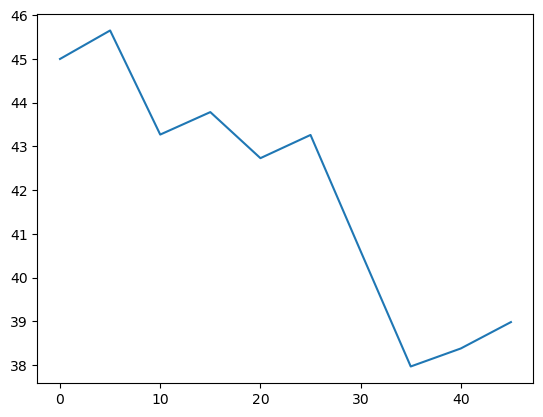

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
all_capomulin_df = mouse_data_clean.loc[mouse_data_clean['Drug Regimen'] == 'Capomulin']
# capomulin_mice 
mouse_b128 = all_capomulin_df.loc[mouse_data['Mouse ID'] == 'b128']
mouse_b128

x_axis = mouse_b128['Timepoint']
y_axis = mouse_b128['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

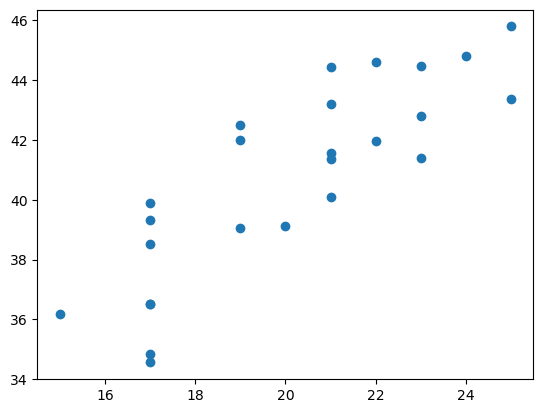

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
all_capomulin_df
capomulin_tumor = all_capomulin_df.groupby(['Mouse ID'])

x_axis = capomulin_tumor['Weight (g)'].mean()
y_axis = capomulin_tumor['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis, y_axis)
plt.show()